# Animation of the evolution of Gault

In [1]:
%matplotlib inline 

import matplotlib.pyplot as plt, numpy as np, jdcal
from matplotlib.ticker import FormatStrFormatter
from scipy.interpolate import griddata
import scipy.ndimage
from matplotlib.gridspec import GridSpec

plt.rc('font', family='serif')
plt.rc('text', usetex=True)

In [93]:
from moviepy.editor import VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage

from astropy.io import fits
from astropy.visualization import AsinhStretch, ZScaleInterval, ImageNormalize

import glob, jdcal

[MoviePy] >>>> Building video img.mp4
[MoviePy] Writing video img.mp4





  0%|          | 0/38 [00:00<?, ?it/s]


  5%|▌         | 2/38 [00:00<00:02, 14.06it/s]


 11%|█         | 4/38 [00:00<00:02, 14.04it/s]


 16%|█▌        | 6/38 [00:00<00:02, 14.19it/s]


 21%|██        | 8/38 [00:00<00:02, 14.34it/s]


 26%|██▋       | 10/38 [00:00<00:01, 14.41it/s]


 32%|███▏      | 12/38 [00:00<00:01, 14.56it/s]


 37%|███▋      | 14/38 [00:00<00:01, 14.69it/s]


 42%|████▏     | 16/38 [00:01<00:01, 12.85it/s]


 47%|████▋     | 18/38 [00:01<00:01, 13.49it/s]


 53%|█████▎    | 20/38 [00:01<00:01, 13.57it/s]


 58%|█████▊    | 22/38 [00:01<00:01, 13.89it/s]


 63%|██████▎   | 24/38 [00:01<00:01, 13.61it/s]


 68%|██████▊   | 26/38 [00:01<00:00, 13.85it/s]


 74%|███████▎  | 28/38 [00:02<00:00, 13.83it/s]


 79%|███████▉  | 30/38 [00:02<00:00, 14.14it/s]


 84%|████████▍ | 32/38 [00:02<00:00, 14.32it/s]


 89%|████████▉ | 34/38 [00:02<00:00, 14.51it/s]


 95%|█████████▍| 36/38 [00:02<00:00, 14.52it/s]


 97%|█████████▋| 37/38 [00:02<00:00, 14.11it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: img.mp4 



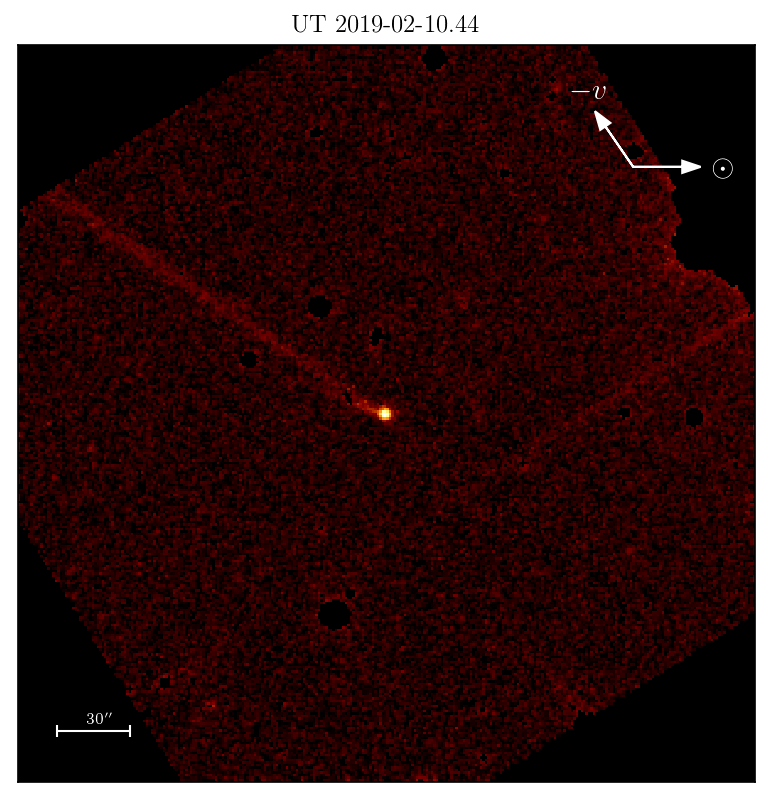

In [139]:
f = plt.figure(figsize=(6.5, 6.5), dpi=150)
ax = f.add_subplot(111)
ax.set_autoscale_on(False)

d = sorted(glob.glob('./stacks/*201[8,9]*-zr*.fits'))
d.append(d[-1])   # makes it stop at the last frame for a bit
d.append(d[-1])
d.append(d[-1])
fps = 2
duration = len(d)/fps

horizons = np.genfromtxt('horizons.txt', usecols=(0, 19, 20)).T

def make_frame(t):
    i = int(np.floor(t*fps))
    
    ax.clear()
    ax.set_facecolor('k')
    
    cmap = 'afmhot'
    hdu_list = fits.open(d[i])
    header = hdu_list[0].header
    image = hdu_list[1].data
    norm = ImageNormalize(image, stretch=AsinhStretch(), vmin=np.nanmean(image)-100, vmax=np.nanmax(image))
    
    ax.imshow(image, cmap=cmap, norm=norm, origin='pwer')
    ax.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
    
    tt = jdcal.jd2gcal(2400000.5, header['OBSJDM']-2400000.5)
    plt.title('UT ' + str(tt[0]) + '-' + str('%02i' % tt[1]) + '-' + str('%02i' % tt[2]) + '.' + str('%.2f' % tt[3])[2:])
    
    ax.arrow(250, 250, 20, 0, color='w', head_width=5)
    ax.text(282, 246, '$\odot$', color='w', fontsize='x-large', weight='black')
    
    psang = horizons[1][(np.abs(horizons[0]-header['OBSJDM'])).argmin()]
    psamv = horizons[2][(np.abs(horizons[0]-header['OBSJDM'])).argmin()]
    dx = 20*np.cos(np.deg2rad(psang-psamv+180))
    dy = -20*np.sin(np.deg2rad(psang-psamv+180))
    ax.arrow(250, 250, dx, dy, color='w', head_width=5)
    ax.text(250+45*np.cos(np.deg2rad(psang-psamv+180)), 250-35*np.sin(np.deg2rad(psang-psamv+180)), '$-v$', color='w', \
           fontsize='x-large', weight='black')
    
    ax.errorbar(30, 20, xerr=15, color='w', lw=1, capsize=3)
    ax.text(27, 23, r"$30''$", color='w', fontsize='x-small')
    
    return mplfig_to_npimage(f)

animation = VideoClip(make_frame, duration=duration)
#animation.ipython_display(fps=fps, loop=True, autoplay=True)
animation.write_videofile('img.mp4', fps=fps)

# A static figure

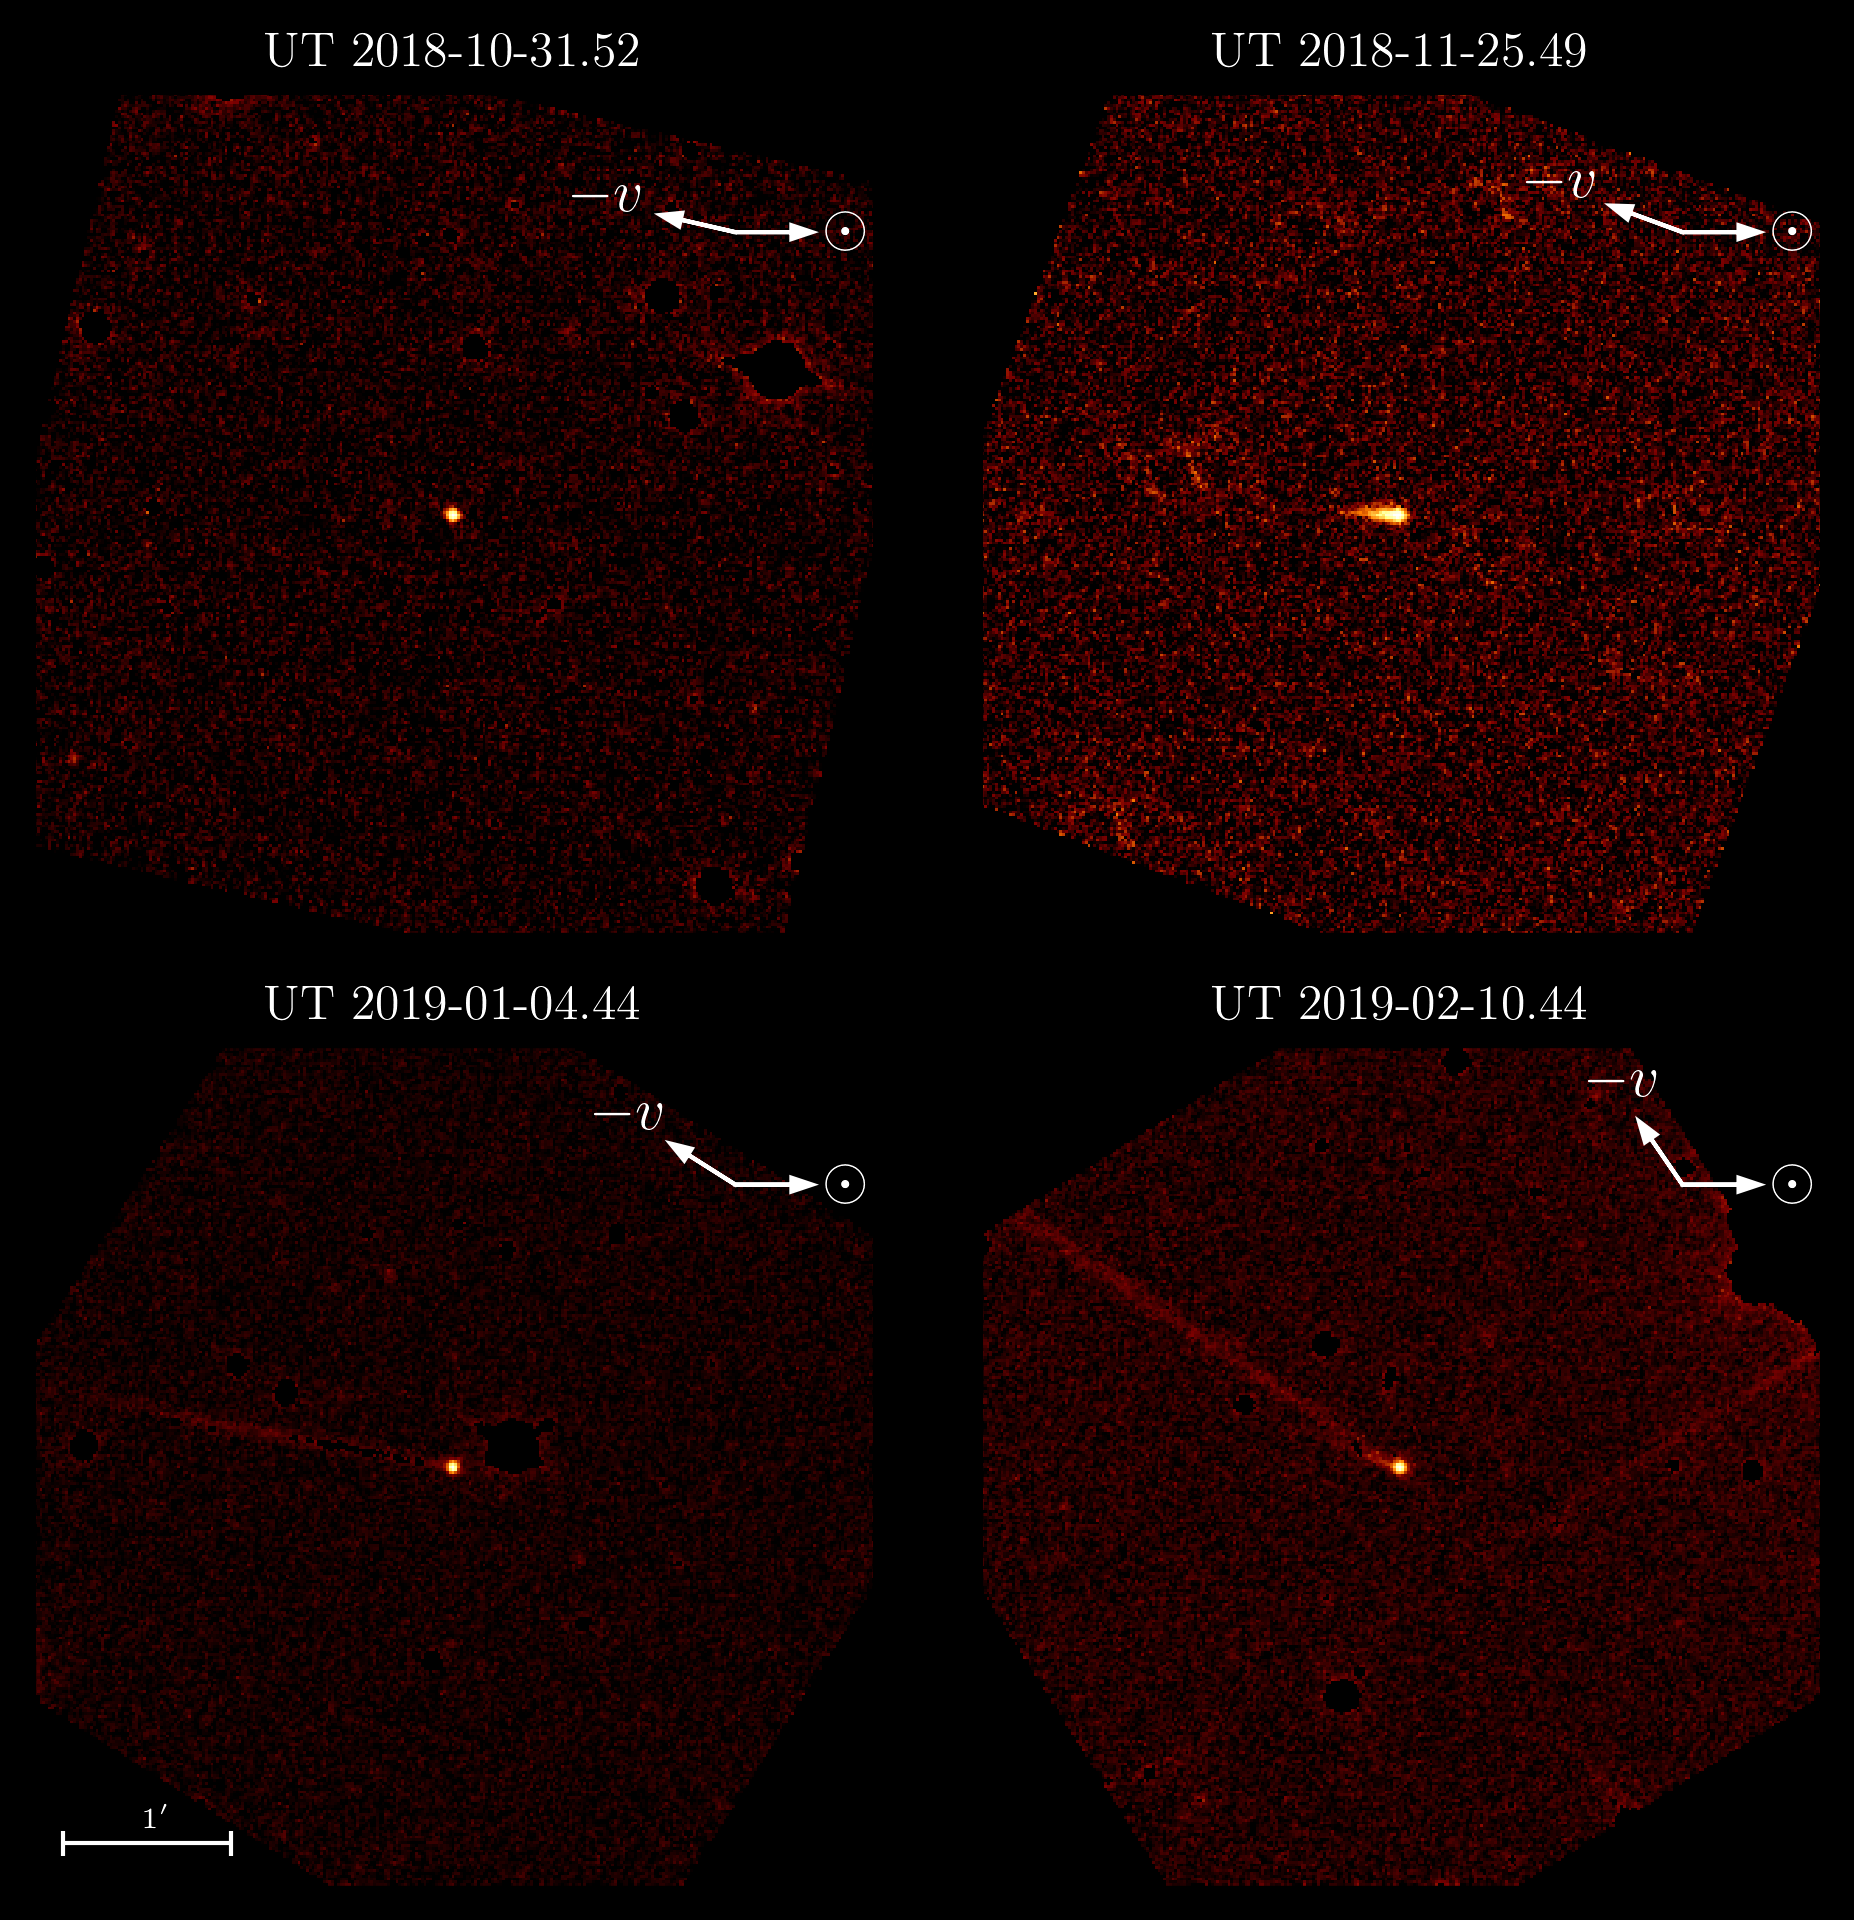

In [143]:
from matplotlib import gridspec

fig = plt.figure(figsize=(6.5, 6.5), dpi=300)
fig.patch.set_facecolor('black')
gs = gridspec.GridSpec(2, 2)

for i, ii in enumerate([0, 11, 22, 33]):
    ax = fig.add_subplot(gs[int(np.floor(i/2)), i%2])
    
    ax.set_autoscale_on(False)

    ax.clear()
    ax.set_facecolor('k')
    
    cmap = 'afmhot'
    hdu_list = fits.open(d[ii])
    header = hdu_list[0].header
    image = hdu_list[1].data
    norm = ImageNormalize(image, stretch=AsinhStretch(), vmin=np.nanmean(image)-100, vmax=np.nanmax(image))
    
    ax.imshow(image, cmap=cmap, norm=norm, origin='lower')
    ax.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
    
    tt = jdcal.jd2gcal(2400000.5, header['OBSJDM']-2400000.5)
    ax.set_title('UT ' + str(tt[0]) + '-' + str('%02i' % tt[1]) + '-' + str('%02i' % tt[2]) + '.' + str('%.2f' % tt[3])[2:], \
                color='w')
    
    ax.arrow(250, 250, 20, 0, color='w', head_width=5)
    ax.text(282, 245, '$\odot$', color='w', fontsize='x-large', weight='black')
    
    psang = horizons[1][(np.abs(horizons[0]-header['OBSJDM'])).argmin()]
    psamv = horizons[2][(np.abs(horizons[0]-header['OBSJDM'])).argmin()]
    dx = 20*np.cos(np.deg2rad(psang-psamv+180))
    dy = -20*np.sin(np.deg2rad(psang-psamv+180))
    ax.arrow(250, 250, dx, dy, color='w', head_width=5)
    ax.text(250+60*np.cos(np.deg2rad(psang-psamv+180)), 250-40*np.sin(np.deg2rad(psang-psamv+180)), '$-v$', color='w', \
           fontsize='x-large', weight='black')
    
    if i == 2:
        ax.errorbar(40, 15, xerr=30, color='w', lw=1, capsize=3)
        ax.text(39, 20, r"$1'$", color='w', fontsize='x-small')

fig.tight_layout()
plt.savefig('img.pdf', facecolor='k')
plt.show()